# Сборный проект №1

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** - выявить определяющие успешность игры закономерности и спланировать рекламную компанию на следующий год.

Исследование пройдет в несколько этапов:
* Обзор данных
* Предобработка данных
* Исследование данных
* Исследование поведения пользователей в регионах продаж
* Проверка гипотез
* Формулирование выводов

## Шаг 1. Откроем файл с данными и изучим общую информацию

Импортируем нужные модули

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Прочитаем файл `games.csv` из папки `datasets` и изучим данные

In [2]:
try:
    games_data = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    games_data = pd.read_csv('../../datasets/games.csv')

In [3]:
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Описание данных:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

Данные за 2016 год могут быть неполными

Видим, что в данных есть пропуски, можно привести названия столбцов к нижнему регистру и данные неоторых столбцов можно привести к соответствуующему типу данных

## Шаг 2. Подготовим данные

Приведем названия столбцов к нижнему регистру

In [5]:
games_data.columns = [col.lower() for col in games_data.columns]

In [6]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В столбце `user_score` помимо пропусков есть значения `tbd(to be determined)`, что означает, что рейтинг еще не сформирован.

In [7]:
games_data.loc[games_data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Я думаю, что раз рейтинга "еще нет", значит лучше заменить эти значения на NaN, т.к. нулем заменять не совсем корректно и это может исказить исследования

In [8]:
games_data.loc[games_data['user_score'] == 'tbd', 'user_score'] = np.nan

И приведем этот столбец к типу `float`

In [9]:
games_data['user_score'] = games_data.loc[:, 'user_score'].astype('float64')

In [10]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Есть по 2 пропуска в столбцах `name` и `genre`, посмотрим их

In [11]:
games_data.loc[games_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в одних и тех же строках, удалим их

In [12]:
games_data = games_data.loc[games_data['name'].notna()]

В столбце `rating` заменим пропуски на заглушку `None`, надеюсь, так можно)

In [13]:
games_data['rating'] = games_data['rating'].fillna('None')

Оставим пропуски в остальных столбцах, так как для них нет логичной замены

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [14]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

## Шаг 3. Проведем исследовательский анализ данных

### Шаг 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

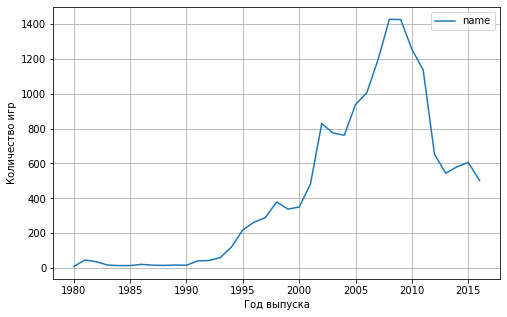

In [16]:
games_data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(figsize=(8,5), grid=True);
plt.ylabel('Количество игр');
plt.xlabel('Год выпуска');

In [17]:
games_data.pivot_table(index='year_of_release', values='name', aggfunc='count').head(15)

,name
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


До 1991 года в среднем выходило менее 40 игр(за исключением 1981 года), поэтому данные за период до 1991 года не важны.

### Шаг 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Найдем платформы с наибольшими суммарными продажами

In [18]:
games_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


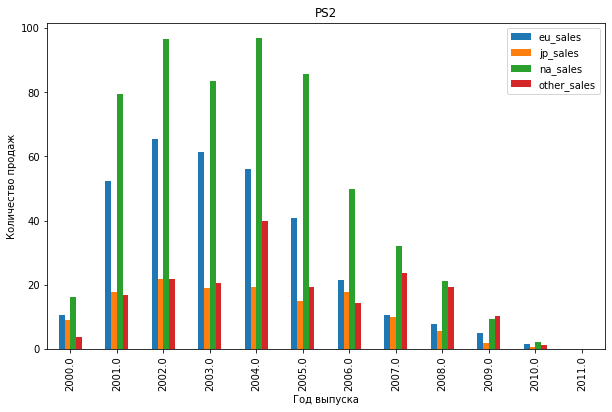

In [19]:
(games_data.query('platform == "PS2"')
           .pivot_table(index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
           .plot(kind='bar', title='PS2', figsize=(10,6)));
plt.ylabel('Количество продаж');
plt.xlabel('Год выпуска');

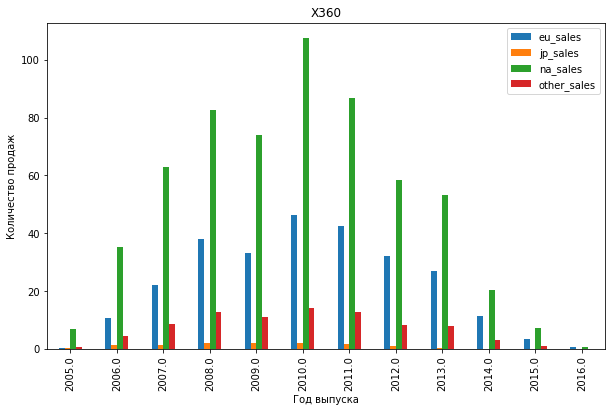

In [20]:
(games_data.query('platform == "X360"')
           .pivot_table(index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
           .plot(kind='bar', title='X360', figsize=(10,6)));
plt.ylabel('Количество продаж');
plt.xlabel('Год выпуска');

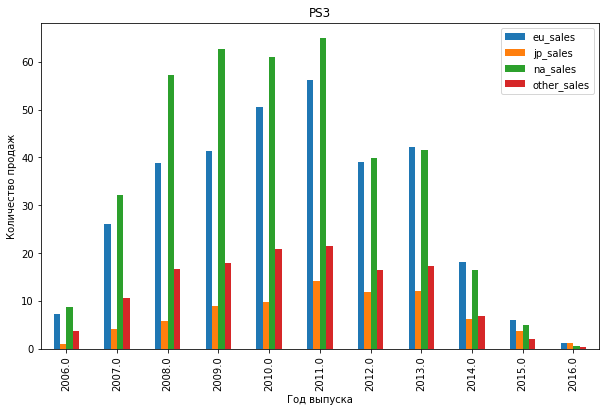

In [21]:
(games_data.query('platform == "PS3"')
           .pivot_table(index='year_of_release', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
           .plot(kind='bar', title='PS3', figsize=(10,6)));
plt.ylabel('Количество продаж');
plt.xlabel('Год выпуска');

In [22]:
top_platforms = list(games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)[:5].index)

In [23]:
top_platforms_data = games_data.query('platform in @top_platforms')

Построим распределение по годам

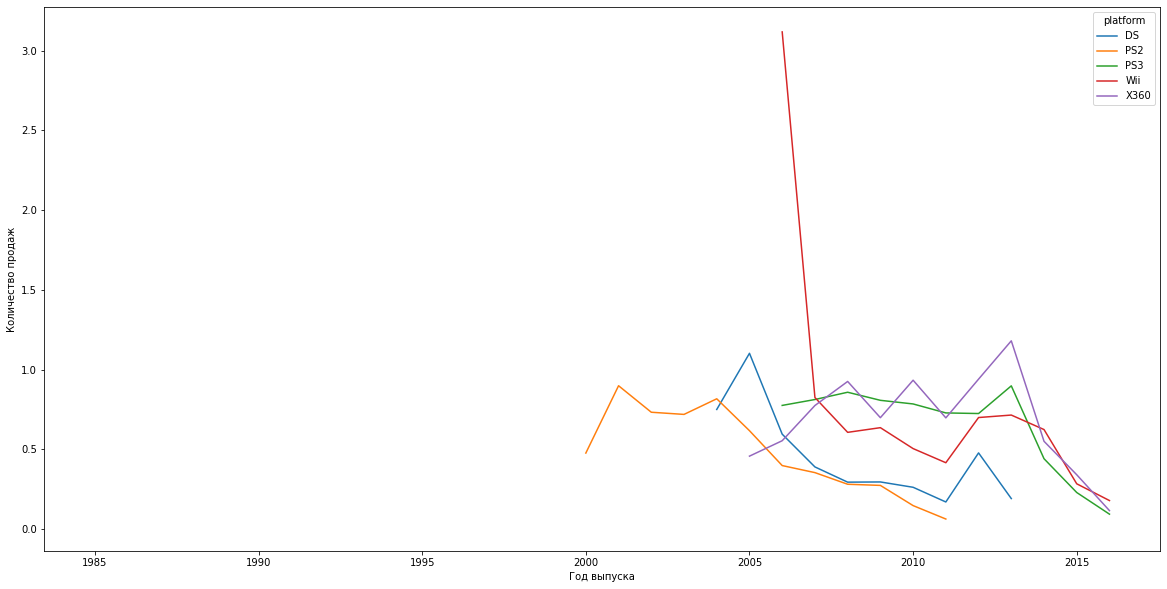

In [24]:
top_platforms_data.pivot_table(index='year_of_release', columns='platform', values='total_sales').plot(figsize=(20,10));
plt.ylabel('Количество продаж');
plt.xlabel('Год выпуска');

Из графика видно, что жизненнный цикл платформы в среднем около 10 лет

### Шаг 3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

**Не учитывайте в работе данные за предыдущие годы.**

Возьмем данные за период с 2014 по 2016 годы

In [25]:
sample_year = games_data.loc[games_data['year_of_release'] >= 2014]

In [26]:
sample_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


### Шаг 3.4 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

In [27]:
sample_year.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Значительно лидируют по продажам платформы PS4 и XOne

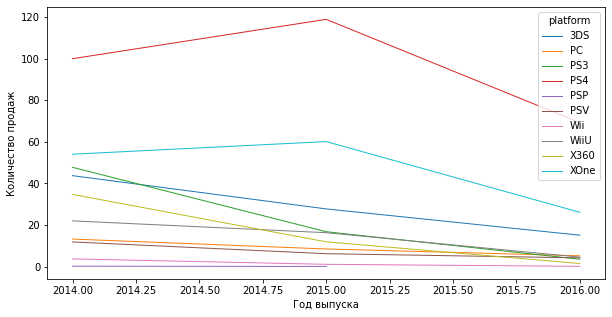

In [28]:
sample_year.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,5), linewidth = 1);
plt.ylabel('Количество продаж');
plt.xlabel('Год выпуска');

Из данного графика видно, что к 2015 году продажи платформ PS4 и XOne растут.

### Шаг 3.5 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

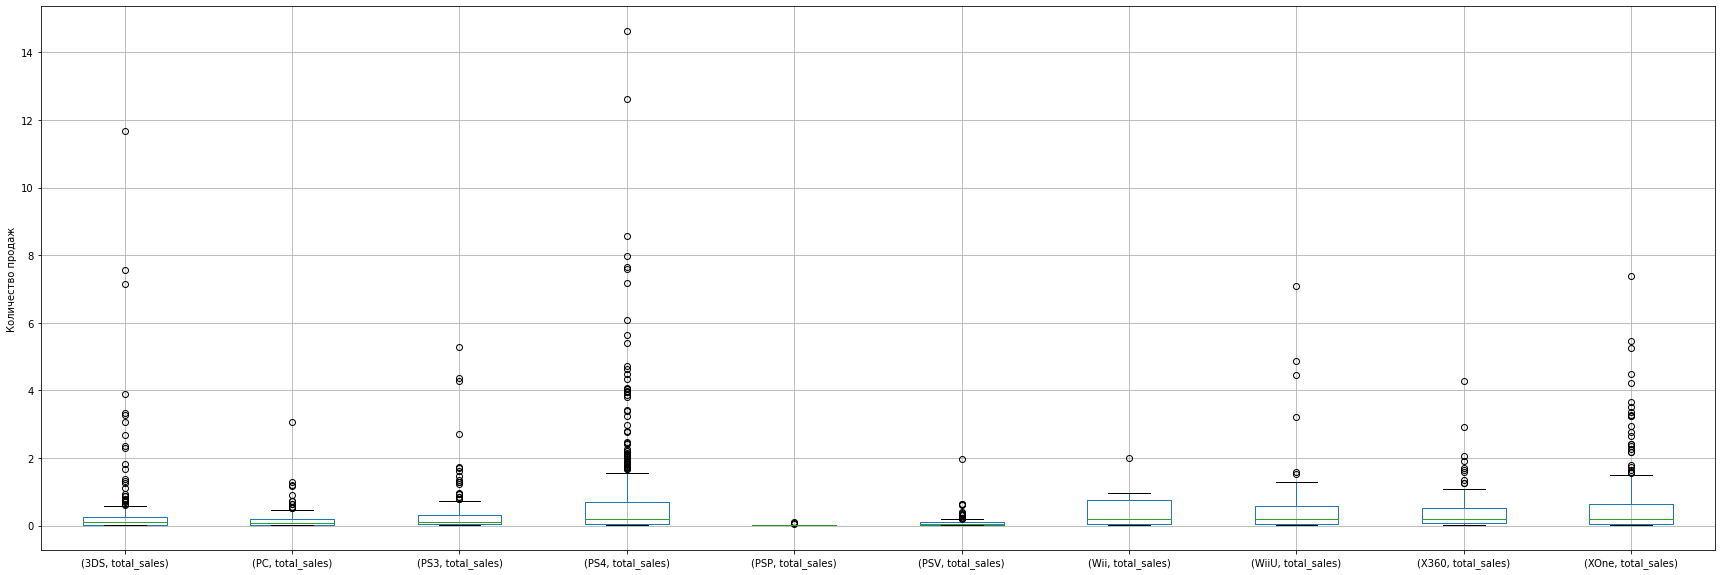

In [29]:
plt.figure(figsize=(30, 10))
sample_year.groupby('platform').boxplot(column='total_sales', subplots=False);
plt.ylabel('Количество продаж');

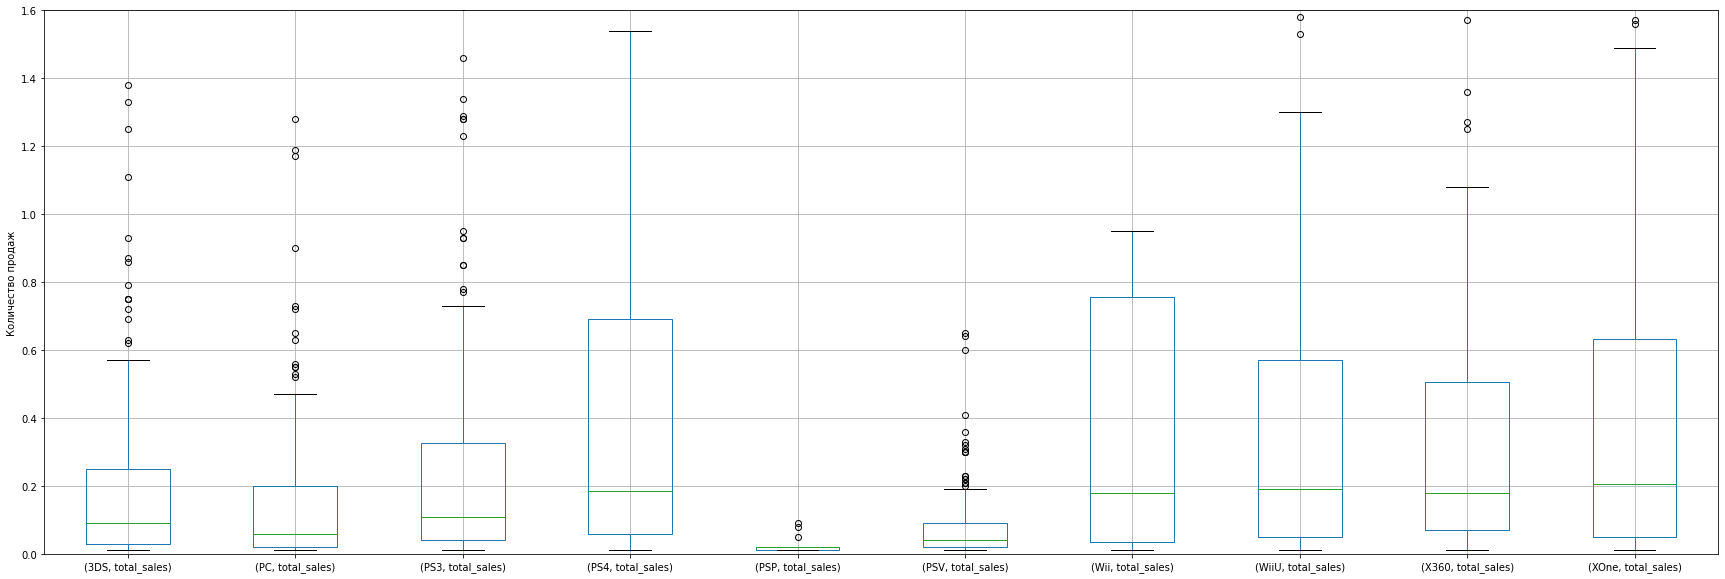

In [30]:
plt.figure(figsize=(30, 10))
plt.ylim(0, 1.6)
sample_year.groupby('platform').boxplot(column='total_sales', subplots=False);
plt.ylabel('Количество продаж');

Из данных графиков так же видно, что лучше всех продаются игры на PS4 и XOne. Медианные значения продаж у них немного отличаются, но так же у них видно большое число игр с продажами свыше 2 млн. копий

### Шаг 3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

В этом исследовании посмотрим на платформу `PS4`, так как у нее наибольшее число продаж

In [31]:
ps4 = sample_year.query('platform == "PS4"')

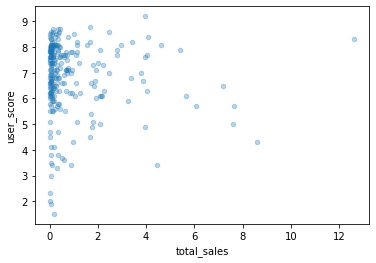

In [32]:
ps4.sort_values(by='total_sales').plot(kind='scatter', x='total_sales', y='user_score', alpha=.3);

In [33]:
ps4['user_score'].corr(ps4['total_sales'])

-0.040131589472697356

Видим очень маленькую обратную зависимость между отзывами пользователей и количеством продаж, следовательно отзывы пользователей не влияют на продажи

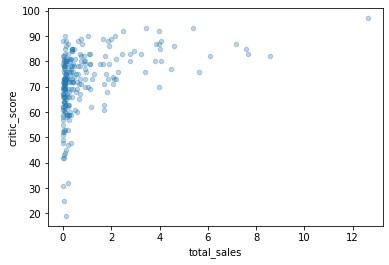

In [34]:
ps4.sort_values(by='total_sales').plot(kind='scatter', x='total_sales', y='critic_score', alpha=.3);

In [35]:
ps4['critic_score'].corr(ps4['total_sales'])

0.40266141068104083

Более сильная прямая зависимость между отзывами критиков и количеством продаж, следовательно отзывы критиков имеют некоторое влияние на количество продаж

### Шаг 3.7 Соотнесите выводы с продажами игр на других платформах

Выделим 5 платформ по топу продаж, за исключением PS4, построим диаграммы рассеяния и посчитаем корреляцию

In [37]:
other_platforms_names = (list(sample_year.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                                         .sort_values(by='total_sales', ascending=False)[1:6]
                                         .index))

In [38]:
other_platforms = sample_year.query('platform in @other_platforms_names')

Платформа - XOne
Зависимость продаж от отзывов пользователей


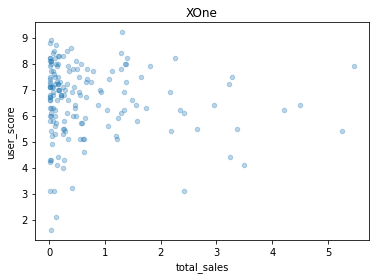

Корреляция между продажами и отзывами пользователей: -0.0703839280647581

Зависимость продаж от отзывов критиков


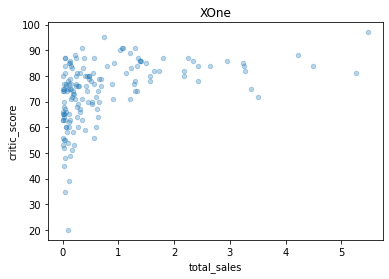

Корреляция между продажами и отзывами критиков: 0.42867694370333226
--------------------------------------------------------


Платформа - 3DS
Зависимость продаж от отзывов пользователей


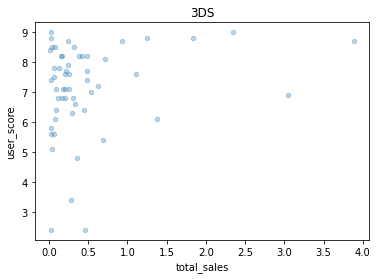

Корреляция между продажами и отзывами пользователей: 0.2151932718527028

Зависимость продаж от отзывов критиков


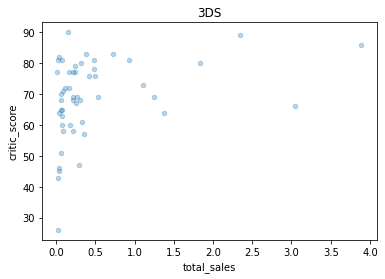

Корреляция между продажами и отзывами критиков: 0.314117492869051
--------------------------------------------------------


Платформа - PS3
Зависимость продаж от отзывов пользователей


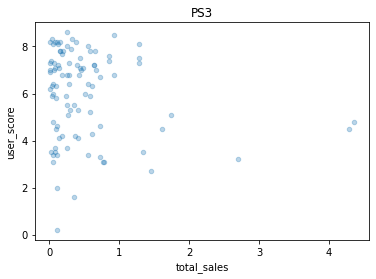

Корреляция между продажами и отзывами пользователей: -0.16676141347662118

Зависимость продаж от отзывов критиков


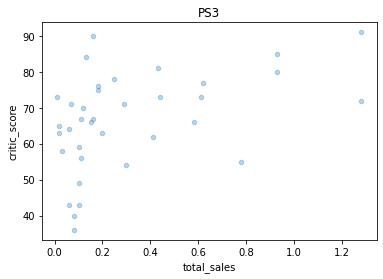

Корреляция между продажами и отзывами критиков: 0.44657460493190704
--------------------------------------------------------


Платформа - X360
Зависимость продаж от отзывов пользователей


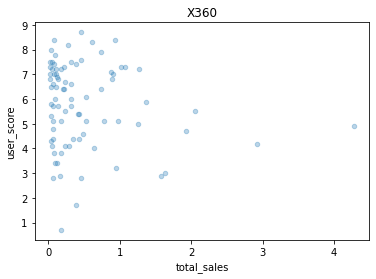

Корреляция между продажами и отзывами пользователей: -0.138444570945665

Зависимость продаж от отзывов критиков


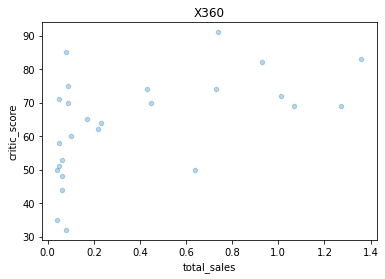

Корреляция между продажами и отзывами критиков: 0.5257228356581523
--------------------------------------------------------


Платформа - WiiU
Зависимость продаж от отзывов пользователей


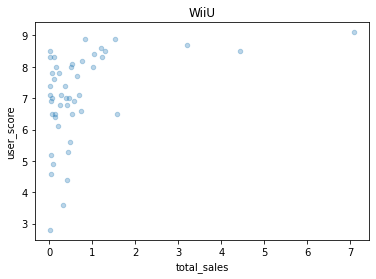

Корреляция между продажами и отзывами пользователей: 0.40792645792170773

Зависимость продаж от отзывов критиков


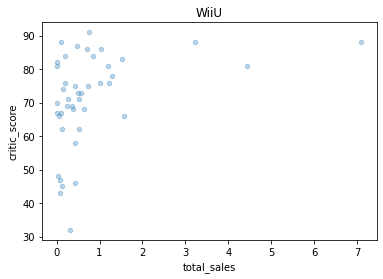

Корреляция между продажами и отзывами критиков: 0.370201412480884
--------------------------------------------------------




In [39]:
for name in other_platforms_names:
    temp = other_platforms.query('platform == @name')
    print(f'Платформа - {name}')
    print('Зависимость продаж от отзывов пользователей')
    temp.sort_values(by='total_sales').plot(kind='scatter', x='total_sales', y='user_score', alpha=.3, title=name);
    plt.show()
    print(f"Корреляция между продажами и отзывами пользователей: {temp['user_score'].corr(temp['total_sales'])}")
    print()
    print('Зависимость продаж от отзывов критиков')
    temp.sort_values(by='total_sales').plot(kind='scatter', x='total_sales', y='critic_score', alpha=.3, title=name);
    plt.show()
    print(f"Корреляция между продажами и отзывами критиков: {temp['critic_score'].corr(temp['total_sales'])}")
    print('--------------------------------------------------------')
    print()
    print()

В большинстве случаев отзывы критиков имеют большее влияние на количество продаж, чем отзывы пользователей

### Шаг 3.8 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


Сравним медианы продаж по жанрам

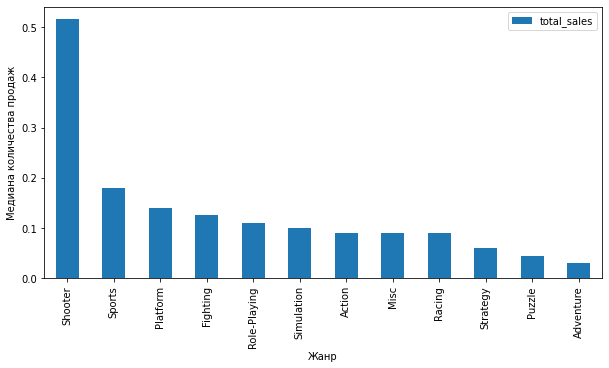

In [39]:
(sample_year.pivot_table(index='genre', values='total_sales', aggfunc='median')
            .sort_values('total_sales', ascending=False)
            .plot(kind='bar', figsize=(10,5)));
plt.ylabel('Медиана количества продаж');
plt.xlabel('Жанр');

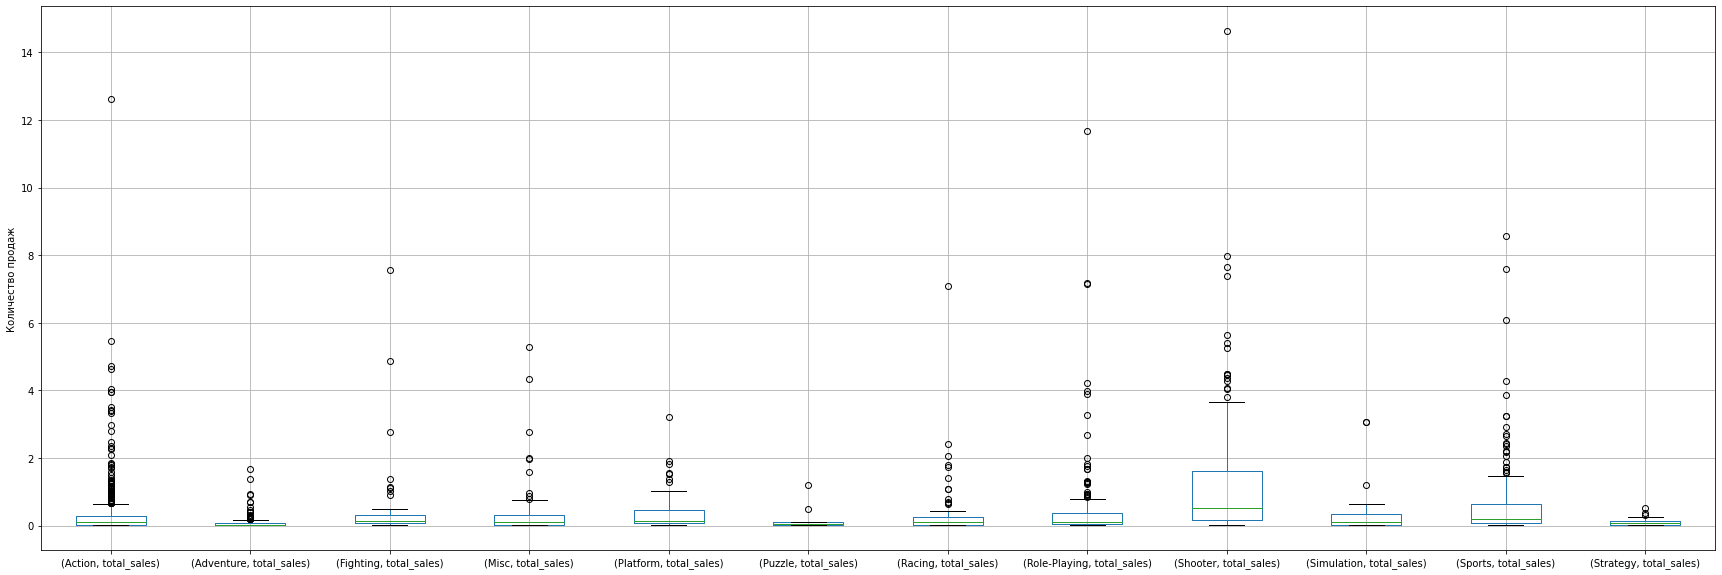

In [41]:
plt.figure(figsize=(30, 10))
sample_year.groupby('genre').boxplot(column='total_sales', subplots=False);
plt.ylabel('Количество продаж');

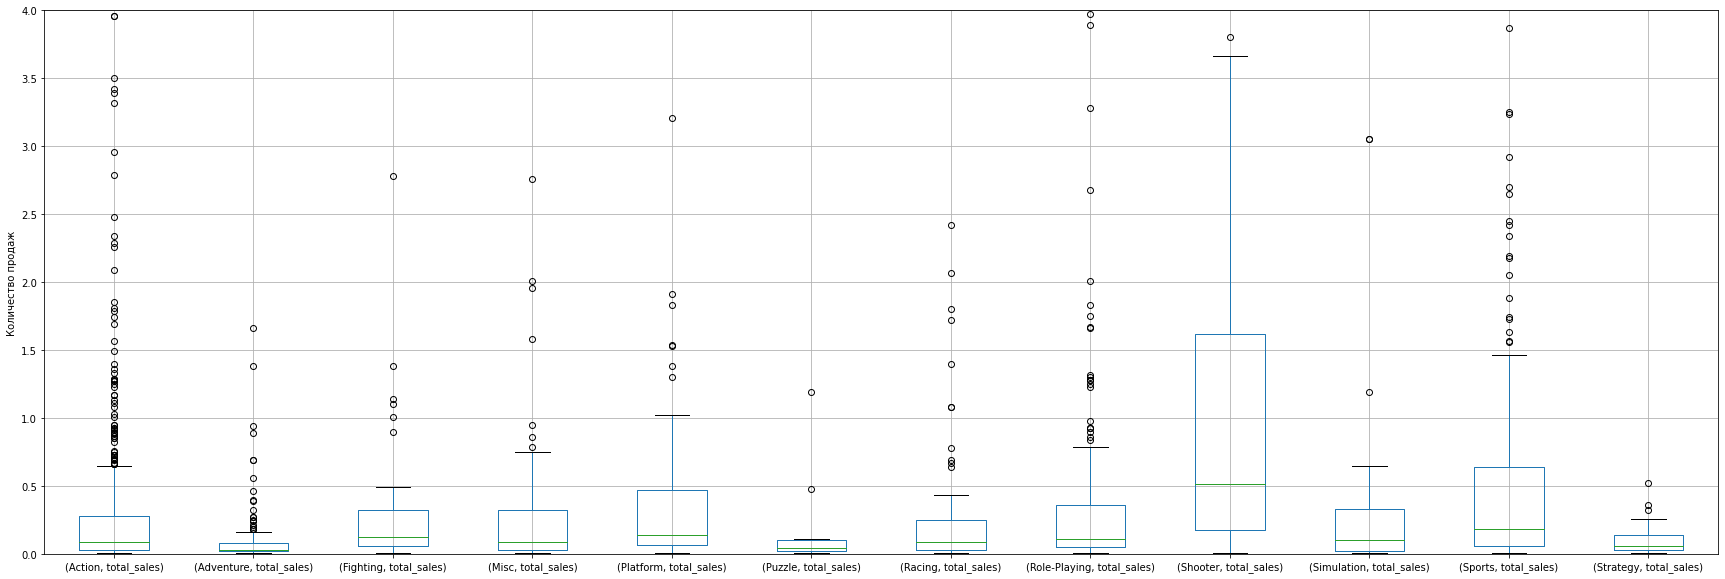

In [42]:
plt.figure(figsize=(30, 10))
sample_year.groupby('genre').boxplot(column='total_sales', subplots=False);
plt.ylabel('Количество продаж');
plt.ylim(0, 4);

Наиболее стабильный жанр - `shooter`, следом за ним идет`sports`. Самые низкие продажи у жанров `strategy`, `adventure`, `puzzle`.

## Шаг 4. Составим портрет пользователя каждого региона

### Шаг 4.1 Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж

Построим круговые диграммы продаж в регионах по платформам

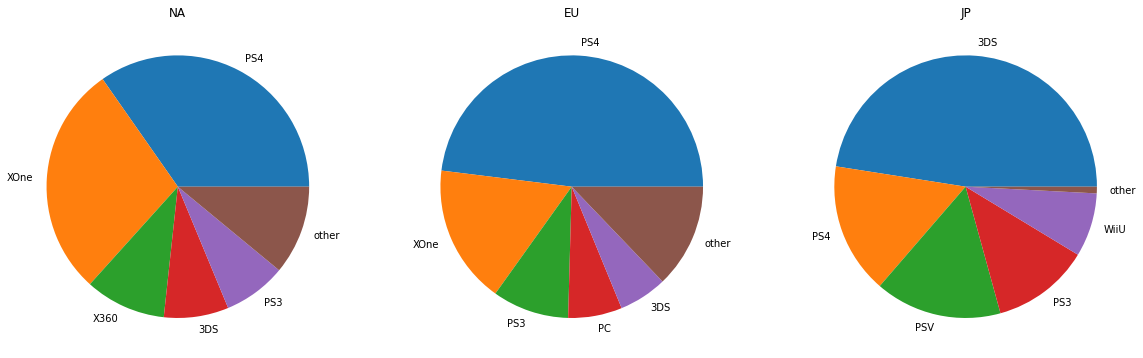

In [90]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
plt.title('NA')
(sample_year.pivot_table(index='platform', values='na_sales', aggfunc='sum')
            .sort_values('na_sales', ascending=False)
            .apply(lambda x: pd.concat([x[:5], pd.Series(data={'other': x.values[5:].sum()})]))
            .plot(kind='pie', subplots=True, legend=False, ylabel='', ax=ax1));
ax2 = fig.add_subplot(132)
plt.title('EU')
(sample_year.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
            .sort_values('eu_sales', ascending=False)
            .apply(lambda x: pd.concat([x[:5], pd.Series(data={'other': x.values[5:].sum()})]))
            .plot(kind='pie', subplots=True, legend=False, ylabel='', ax=ax2));
ax3 = fig.add_subplot(133)
plt.title('JP')
(sample_year.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
            .sort_values('jp_sales', ascending=False)
            .apply(lambda x: pd.concat([x[:5], pd.Series(data={'other': x.values[5:].sum()})]))
            .plot(kind='pie', subplots=True, legend=False, ylabel='', ax=ax3));

В Северной Америке и Европе преобладает платформа `PS4`, в Японии - `3DS`

### Шаг 4.2 Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясним разницу

Построим диграмму продаж по жанрам North America 

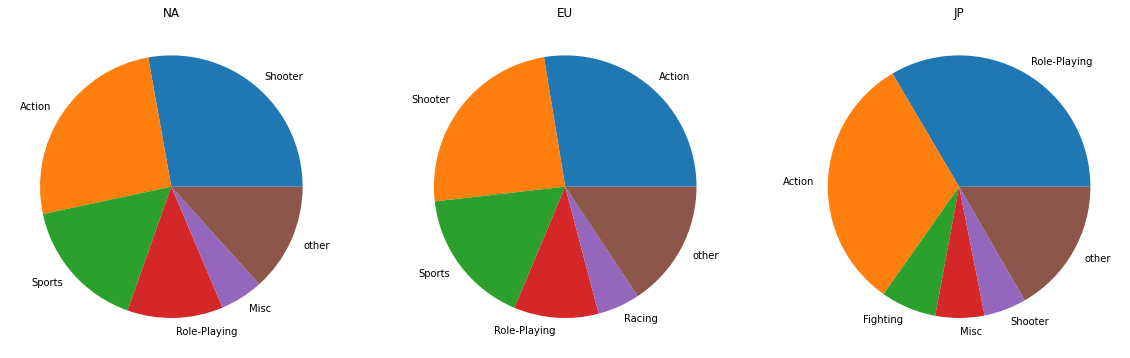

In [89]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
plt.title('NA')
(sample_year.pivot_table(index='genre', values='na_sales', aggfunc='sum')
            .sort_values('na_sales', ascending=False)
            .apply(lambda x: pd.concat([x[:5], pd.Series(data={'other': x.values[5:].sum()})]))
            .plot(kind='pie', subplots=True, legend=False, ylabel='', ax=ax1));
ax2 = fig.add_subplot(132)
plt.title('EU')
(sample_year.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
            .sort_values('eu_sales', ascending=False)
            .apply(lambda x: pd.concat([x[:5], pd.Series(data={'other': x.values[5:].sum()})]))
            .plot(kind='pie', subplots=True, legend=False, ylabel='', ax=ax2));
ax3 = fig.add_subplot(133)
plt.title('JP')
(sample_year.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
            .sort_values('jp_sales', ascending=False)
            .apply(lambda x: pd.concat([x[:5], pd.Series(data={'other': x.values[5:].sum()})]))
            .plot(kind='pie', subplots=True, legend=False, ylabel='', ax=ax3));

Как видно из графиков, в Америке лидирует жанр `shooter`, в Европе - `Action`, в Японии - `RPG`

### Шаг 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

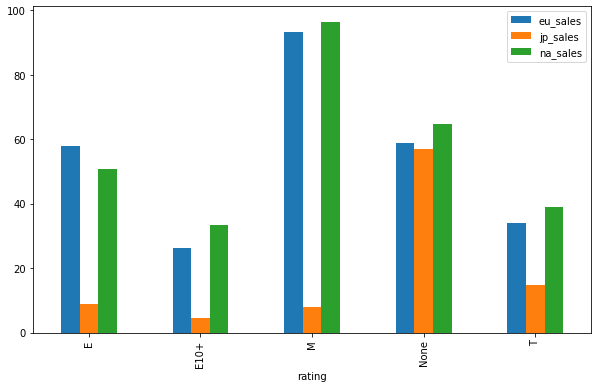

In [105]:
sample_year.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(kind='bar', figsize=(10, 6));

Игры без рейтинга ESRB более стабильно продаются во всех странах

## Шаг 5. Проверим гипотезы

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Исходя из задания, сформулируем нулевую гипотезу как равенство средних двух совокупностей:
    
**Средние пользовательские рейтинги платформ Xbox One и PC равны**.

**Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны**.

Критический уровень значимости установим в 5%.

В данных имеются пропуски, которые не на что заменить. Для корректного рассчета `pvalue` от них нужно избавиться

In [107]:
XOne = sample_year.loc[sample_year['platform'] == 'XOne', 'user_score'].dropna()
print('Размер выборки - ', XOne.shape[0])
print('Дисперсия - ', np.var(XOne))

Размер выборки -  165
Дисперсия -  1.8795460055096425


In [108]:
PC = sample_year.loc[sample_year['platform'] == 'PC', 'user_score'].dropna()
print('Размер выборки - ', PC.shape[0])
print('Дисперсия - ', np.var(PC))

Размер выборки -  122
Дисперсия -  2.8773743617307175


Так как нам нужно сравнить средние двух независимых друг от друга выборок, используем метод `scipy.stats.ttest_ind()`, параметр `equal_var` установим в False, потому что выборки разного размера и их дисперсии не равны

In [109]:
alpha = 0.05

print(f'Средний пользовательский рейтинг платформы XOne: {XOne.mean()}')
print(f'Средний пользовательский рейтинг платформы PC: {PC.mean()}')
print()

result = scipy.stats.ttest_ind(XOne, PC, equal_var=False)

if result.pvalue < alpha:
    print(f'pvalue: {result.pvalue}')
    print("Отвергаем нулевую гипотезу")
else:
    print(f'pvalue: {result.pvalue}')
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформы XOne: 6.594545454545456
Средний пользовательский рейтинг платформы PC: 6.298360655737705

pvalue: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Так как `pvalue` в данном случае больше 5% уровня значимости, принимаем нулевую гипотезу.

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

**Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны**

**Альтернативная гипотеза**: **Средние пользовательские рейтинги жанров Action и Sports не равны**

Проверим:

In [110]:
action = sample_year.loc[sample_year['genre'] == 'Action', 'user_score'].dropna()
print('Размер выборки - ', action.shape[0])
print('Дисперсия - ', np.var(action))

Размер выборки -  297
Дисперсия -  1.89208448117539


In [111]:
sports = sample_year.loc[sample_year['genre'] == 'Sports', 'user_score'].dropna()
print('Размер выборки - ', sports.shape[0])
print('Дисперсия - ', np.var(sports))

Размер выборки -  127
Дисперсия -  3.4198375596751185


In [112]:
alpha = 0.05

print(f'Средний пользовательский рейтинг жанра Action: {action.mean()}')
print(f'Средний пользовательский рейтинг жанра Sports: {sports.mean()}')
print()

result = scipy.stats.ttest_ind(action, sports, equal_var=False)

if result.pvalue < alpha:
    print(f'pvalue: {result.pvalue}')
    print("Отвергаем нулевую гипотезу")
else:
    print(f'pvalue: {result.pvalue}')
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports: 5.2251968503937

pvalue: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Так как `pvalue` в данном случае меньше 5% уровня значимости, отвергаем нулевую гипотезу и принимаем первую.

## Шаг 6. Общий вывод

В рамках данного проекта мы провели исследование данных о продажах игр. По предоставленным данным мы выяснили:

* актуальный период для исследования - 2014-2016 годы
* перспективные платформы - PS4, XOne
* количество продаж игр зависит от отзывов критиков
* самый стабильный жанр во всех регионах - Action
* наиболее стабильны продажи игр во всех регионах без рейтинга ESRB

В ходе исследования мы подтвердили две гипотезы:
* "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

* "Средние пользовательские рейтинги жанров Action и Sports разные"